<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/9-LinearRegression(assignment1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/Farah-Deeba-UNCC/Introduction-to-ML.git

Cloning into 'Introduction-to-ML'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 342 (delta 125), reused 161 (delta 75), pack-reused 101
Receiving objects: 100% (342/342), 2.90 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (153/153), done.


## Load data
 The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The dataset is loaded from the data file into the variables X and Y:

In [14]:
df =pd.read_csv('Introduction-to-ML/Data/D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


## Initialization
 To take into account the intercept term , we add an additional first column to df and set it to all ones.

 In the following lines, we add another dimension to our data to accommodate the  intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01

In [15]:
#Lets create a matrix with a dimension of m by 1. m is the number of observations
m = df.X1.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
df.insert(0, "X0",X_0)
display(df)

,X0,X1,X2,X3,Y
0,1.0,0.000000,3.440000,0.440000,4.387545
1,1.0,0.040404,0.134949,0.888485,2.679650
2,1.0,0.080808,0.829899,1.336970,2.968490
3,1.0,0.121212,1.524848,1.785455,3.254065
4,1.0,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...,...
95,1.0,3.838384,1.460202,3.046061,-4.440595
96,1.0,3.878788,2.155152,3.494545,-4.458663
97,1.0,3.919192,2.850101,3.943030,-4.479995
98,1.0,3.959596,3.545051,0.391515,-3.304593


Let's define a function, computeCost, that will compute the cost for a given set of $\theta$ values;

In [21]:
def computeCost(X,y,theta):
  """
  Compute cost for linear regression.
  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
  m= number of training examples
  n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  Output Parameters
  -----------------
  J : Scalar value.
  """
  m = len(X)
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J


Let's define a function, gradientDescent to implement the gradient descent algorithm and optimize the $\theta$ values.

In [25]:
def gradientDescent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension ( n x 1)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = computeCost(X, y, theta)
  return theta, cost_history

In [41]:
X = df.loc[:,['X0','X1','X2','X3']]
y = df.Y
theta = np.zeros(2)
iterations = 10000;
alpha = 0.1;

# calling our gradient_decsent function for X1
Xarray = X.loc[:,['X0','X1']].values
yarray = y.values
theta1, cost_history1 = gradientDescent(Xarray, yarray, theta, alpha, iterations)
print('Final value of theta =', theta1)

# calling our gradient_decsent function for X2
Xarray = X.loc[:,['X0','X2']].values
theta2, cost_history2 = gradientDescent(Xarray, yarray, theta, alpha, iterations)
print('Final value of theta =', theta2)

# calling our gradient_decsent function for X3
Xarray = X.loc[:,['X0','X3']].values
theta3, cost_history3 = gradientDescent(Xarray, yarray, theta, alpha, iterations)
print('Final value of theta =', theta3)


Final value of theta = [ 5.92794892 -2.03833663]
Final value of theta = [0.73606043 0.55760761]
Final value of theta = [ 2.8714221  -0.52048288]


## 1.1 Report the linear model you found for each explanatory variable.

In [33]:
#linear model when explanatory variable is X1
print("y=",theta1[1],"x1 +",theta1[0])

#linear model for the second column
print("y=",theta2[1],"x2 +",theta2[0])

#linear model for the third column
print("y=",theta3[1],"x3 +",theta3[0])


y= -1.7966800851091562 x1 + 5.307051146689822
y= 0.5762707183264685 x2 + 0.6881090891180935
y= -0.4121853134377709 x3 + 2.597593717856112


## 1.2. Plot the regression model and loss over the iteration per each explanatory variable.

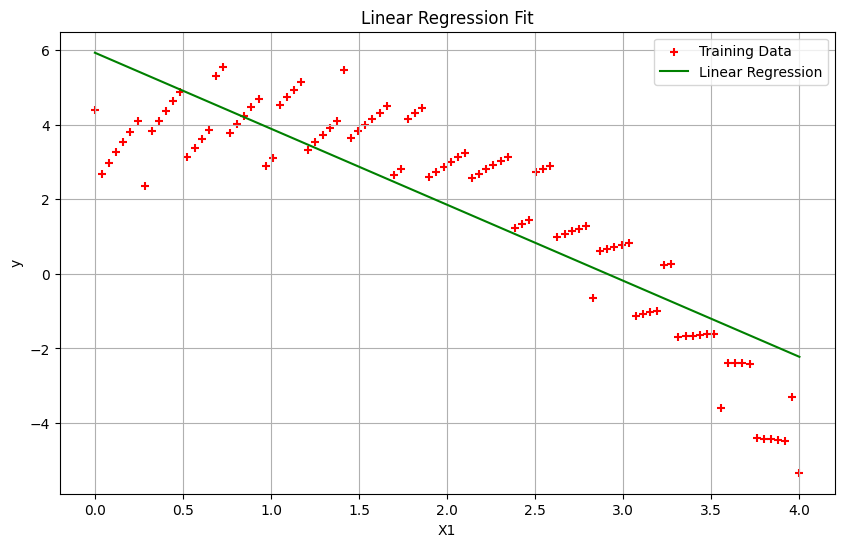

In [37]:
# plotting the final regression model for the first column
plt.scatter(X.X1, y, color='red', marker= '+', label= 'Training Data')
Xarray = X.loc[:,['X0','X1']].values
plt.plot(X.X1, Xarray.dot(theta1), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

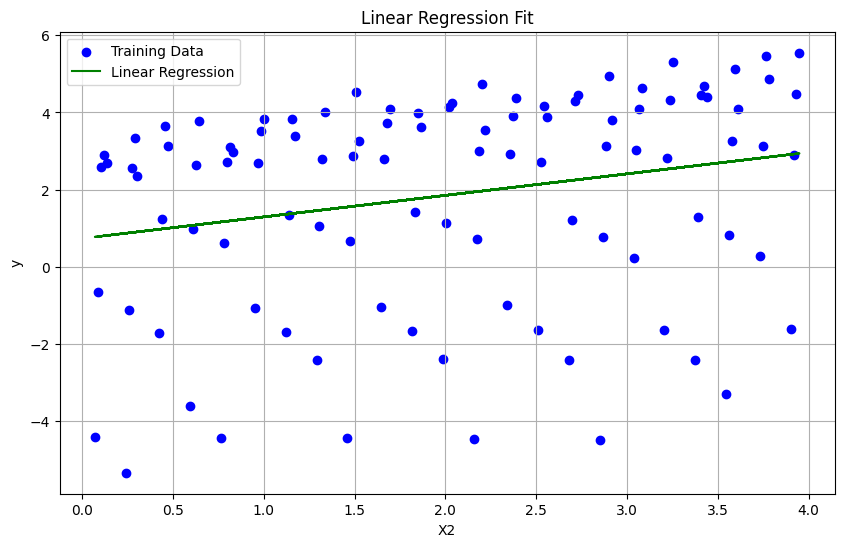

In [39]:
#plotting the final regression model for the second column
plt.scatter(X.X2, y, color='blue', marker= 'o', label= 'Training Data')
Xarray = X.loc[:,['X0','X2']].values
plt.plot(X.X2, Xarray.dot(theta2), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

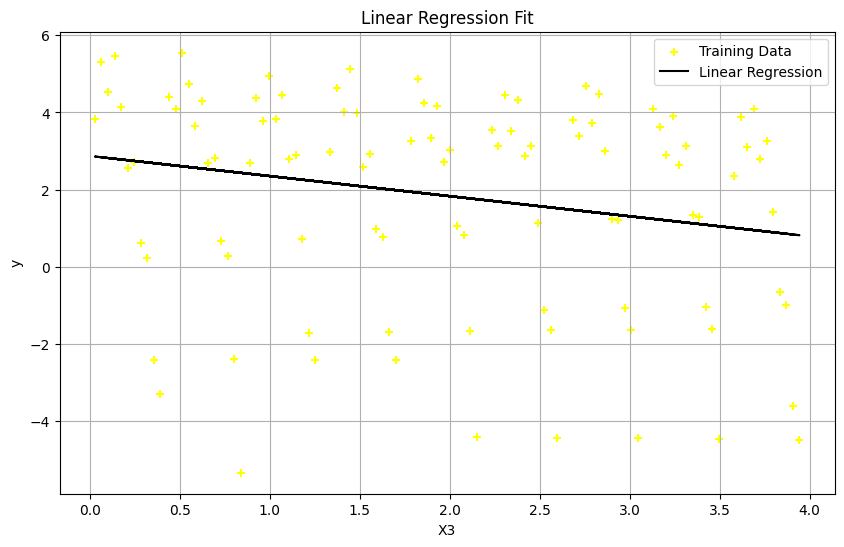

In [40]:
plt.scatter(X.X3, y, color='yellow', marker= '+', label= 'Training Data')
Xarray = X.loc[:,['X0','X3']].values
plt.plot(X.X3, Xarray.dot(theta3), color='black', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

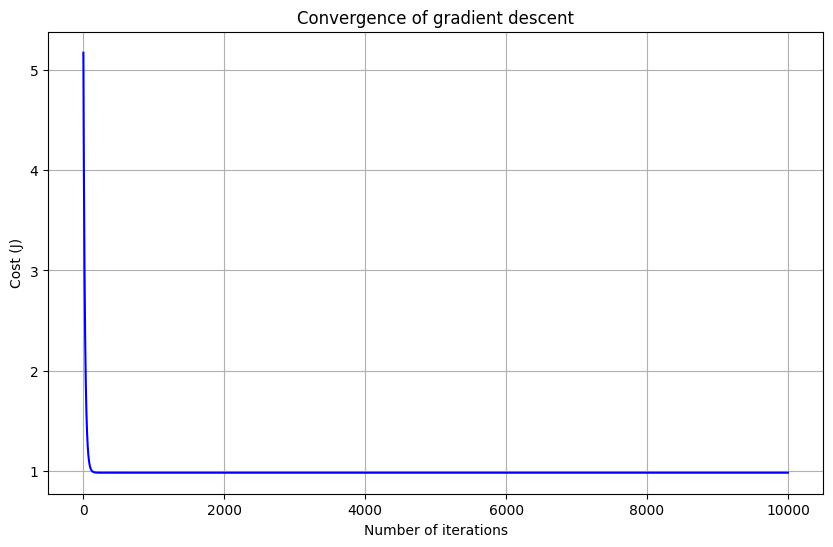

In [42]:
#plotting the loss over iteration graph for explanatory variable x1
plt.plot(range(1, iterations + 1),cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X1')

Text(0.5, 1.0, 'Loss for X2')

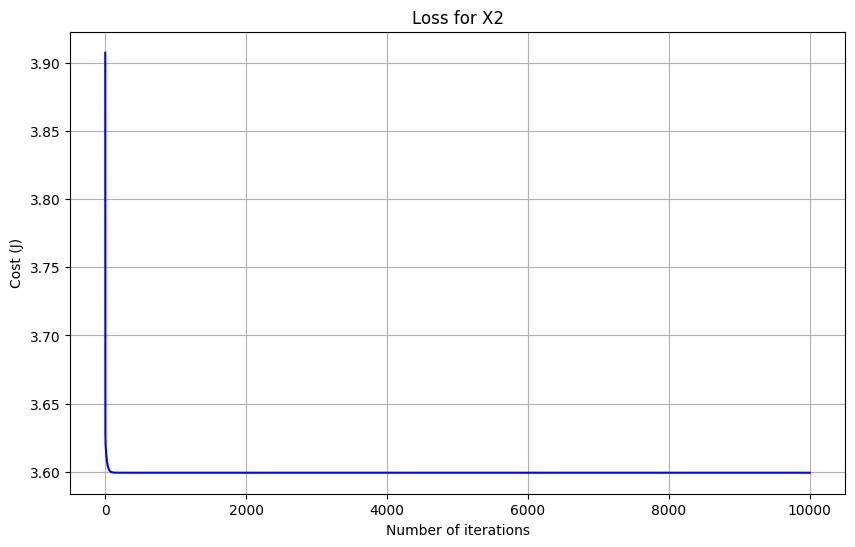

In [43]:
#plotting the loss over iteration graph for explanatory variable x2
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X2')

Text(0.5, 1.0, 'Loss for X3')

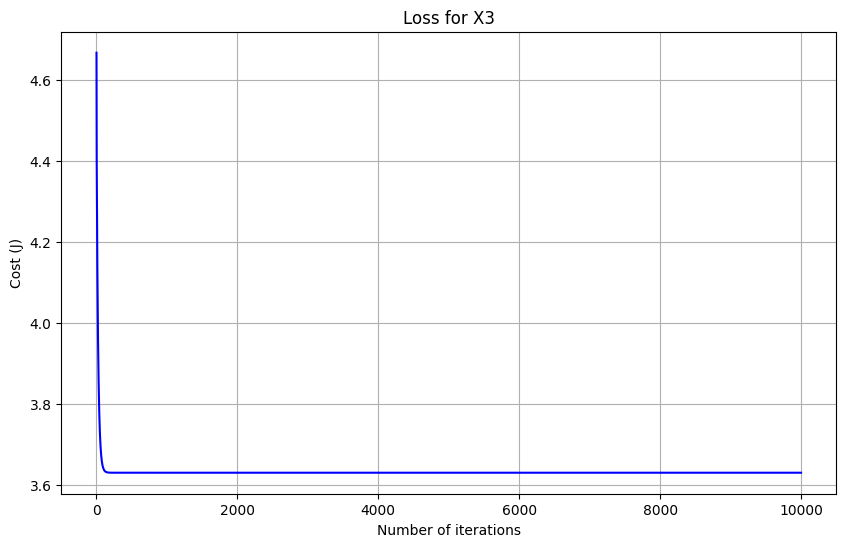

In [45]:
#plotting the loss over iteration graph for explanatory variable x3
plt.plot(range(1, iterations + 1),cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss for X3')

## 1.3 lower loss (cost) for explanatory variables explaining the output (Y)


In [55]:
print("final loss for the first column:", cost_history1[-1])
print("final loss for the second column:", cost_history2[-1])
print("final loss for the third column:", cost_history3[-1])

final loss for the first column: 0.9849930825405946
final loss for the second column: 3.5993660181680425
final loss for the third column: 3.6294511246079155
The lowest cost was found for X1 0.9849930825405946


The lowest cost was found when the expla X1.

## Visulazing $J(\theta)$
To understand the cost function  better, we will now plot the cost over a 2-dimensional grid of  and  values.

In [ ]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 500);
theta1_vals = np.linspace(-1, 4, 100);
# initialize J vals to a matrix of 0's
J_vals = np.zeros(shape = (len(theta1_vals),len(theta0_vals)));
for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t = [theta0_vals[i], theta1_vals[j]]
    J_vals[j,i] = computeCost(X, y, t)

In [ ]:
print (J_vals)

[[328.09290555 327.13182759 326.17235606 ...  48.43797327  48.27528569
   48.11420452]
 [316.6648683  315.72030783 314.77735377 ...  45.21912329  45.07295318
   44.9283895 ]
 [305.44447299 304.51643    303.58999342 ...  42.20791524  42.07826261
   41.95021641]
 ...
 [186.35412584 186.99524338 187.63796735 ... 702.99035811 704.42986603
  705.87098036]
 [195.06735595 195.72499097 196.38423242 ... 719.91277548 721.36880088
  722.82643269]
 [203.98822799 204.66238049 205.33813942 ... 737.04283479 738.51537766
  739.98952696]]


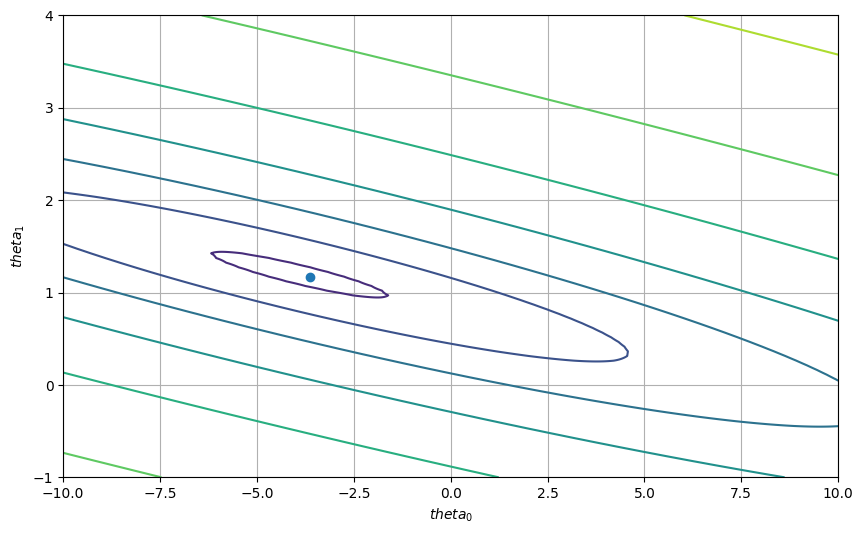

In [ ]:
## Contour Plot
import matplotlib.pyplot as plt
# Plot J_vals as contours spaced logarithmically

plt.contour(theta0_vals, theta1_vals, np.log(J_vals))
plt.xlabel('$theta_0$')
plt.ylabel('$theta_1$')
plt.scatter(theta[0],theta[1])
plt.grid()
plt.show()